<a href="https://colab.research.google.com/github/CAllans-Git/aai-iot-cleaning-and-eda/blob/main/Cleaning_%26_EDA_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things.

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Additional libraries can be imported here
# Define any helper functions here

In [9]:
import seaborn as sns
from datetime import datetime
import os

# If more advanced statistical analysis is needed
import scipy.stats as stats

# For more advanced data manipulation
import dask.dataframe as dd

# A helper function
def plot_timeseries(data, column, title='Time Series Plot', xlabel='Time', ylabel='Value'):
    """
    This function plots a time series from a given DataFrame.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column (str): The column name to be plotted.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data[column], label=column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [10]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

<ipython-input-10-3fba114b5bcf>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [11]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [12]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [13]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [14]:
#create your Datetime column
# Combine and convert 'Date' and 'Time' to datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

In [15]:
#convert all data columns to numeric types
# Convert other columns to numeric, handling errors
for col in df.columns.drop(['Date', 'Time', 'Datetime']):
    df[col] = pd.to_numeric(df[col], errors='coerce')

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [16]:
# Splitting Datetime into Date and Time
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time


In [17]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [18]:
# Checking type of Date and Time columns
df.Date[0]

datetime.date(2006, 12, 16)

In [19]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [20]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

<Axes: >

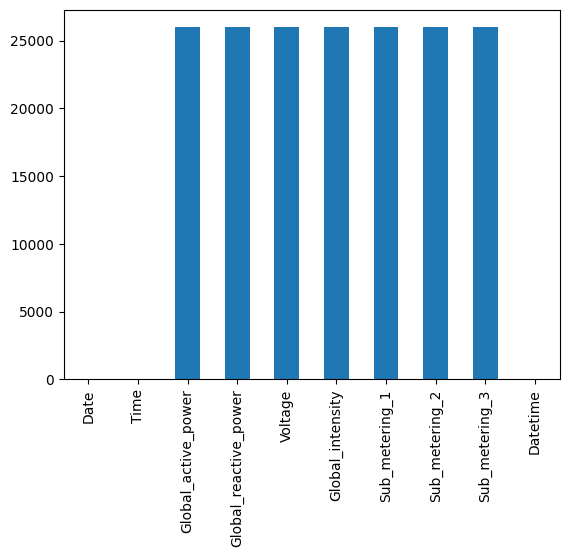

In [21]:
# Visualizing missing data
df.isna().sum().plot.bar()

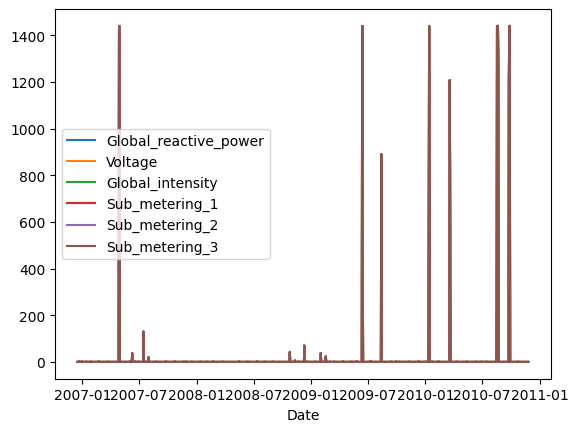

In [22]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis=1).isna().groupby(df.Date, sort=False).sum().reset_index()
columns_to_plot = df_na.columns[3:-1]
df_na.plot(x='Date', y=columns_to_plot)
plt.show()

**Q: What do you notice about the pattern of missing data?**

A: The pattern of missing data shows that the absence of data points is not random but occurs in specific periods, which could be indicative of system outages or external factors affecting data collection. This is supported by the spikes in the second visualization, where certain days have a significant number of missing values across different variables.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: The appropriate method for dealing with missing data depends on the pattern observed and the underlying reasons. Given the non-random nature of the missing data, it may not be suitable to simply fill in gaps with mean or median values. If the missing data are in blocks (e.g., entire days missing), one approach could be to exclude those periods from analysis if they are not significant in number. Alternatively, if the dataset is large enough, one could use interpolation methods for gaps that are shorter in duration. If the missing data are correlated with specific events or conditions, incorporating this information into the imputation process could be beneficial. In time series data, forward fill or backward fill methods can also be appropriate if the missing values are assumed to be similar to their immediate neighbors. The choice of method would ideally be based on a deeper understanding of the data collection process and the importance of maintaining the integrity of the time series.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [ ]:
#clean up missing data here

In [23]:
df_cleaned = df.dropna()

In [24]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A:
Global_active_power: Represents the total active power consumed by the household. It's a key indicator of overall energy usage.
Global_reactive_power: Shows the reactive power, which, although doesn't contribute to total energy consumption, affects the efficiency of the electrical system.
Voltage: Indicates the supply voltage level, which can vary and affect the performance of electrical appliances.
Global_intensity: Reflects the total current consumed, correlating closely with active power but can offer distinct insights, especially in relation to voltage.
These variables are interesting to compare over time as they directly relate to the household's electricity consumption patterns. Variations in these metrics can reveal usage trends, efficiency issues, or even identify periods of abnormal consumption which might warrant further investigation.

To visualize these variables, we can plot each as a separate line chart over time, using the Datetime column for the x-axis. This will allow us to observe how each metric changes over the dataset's time span.

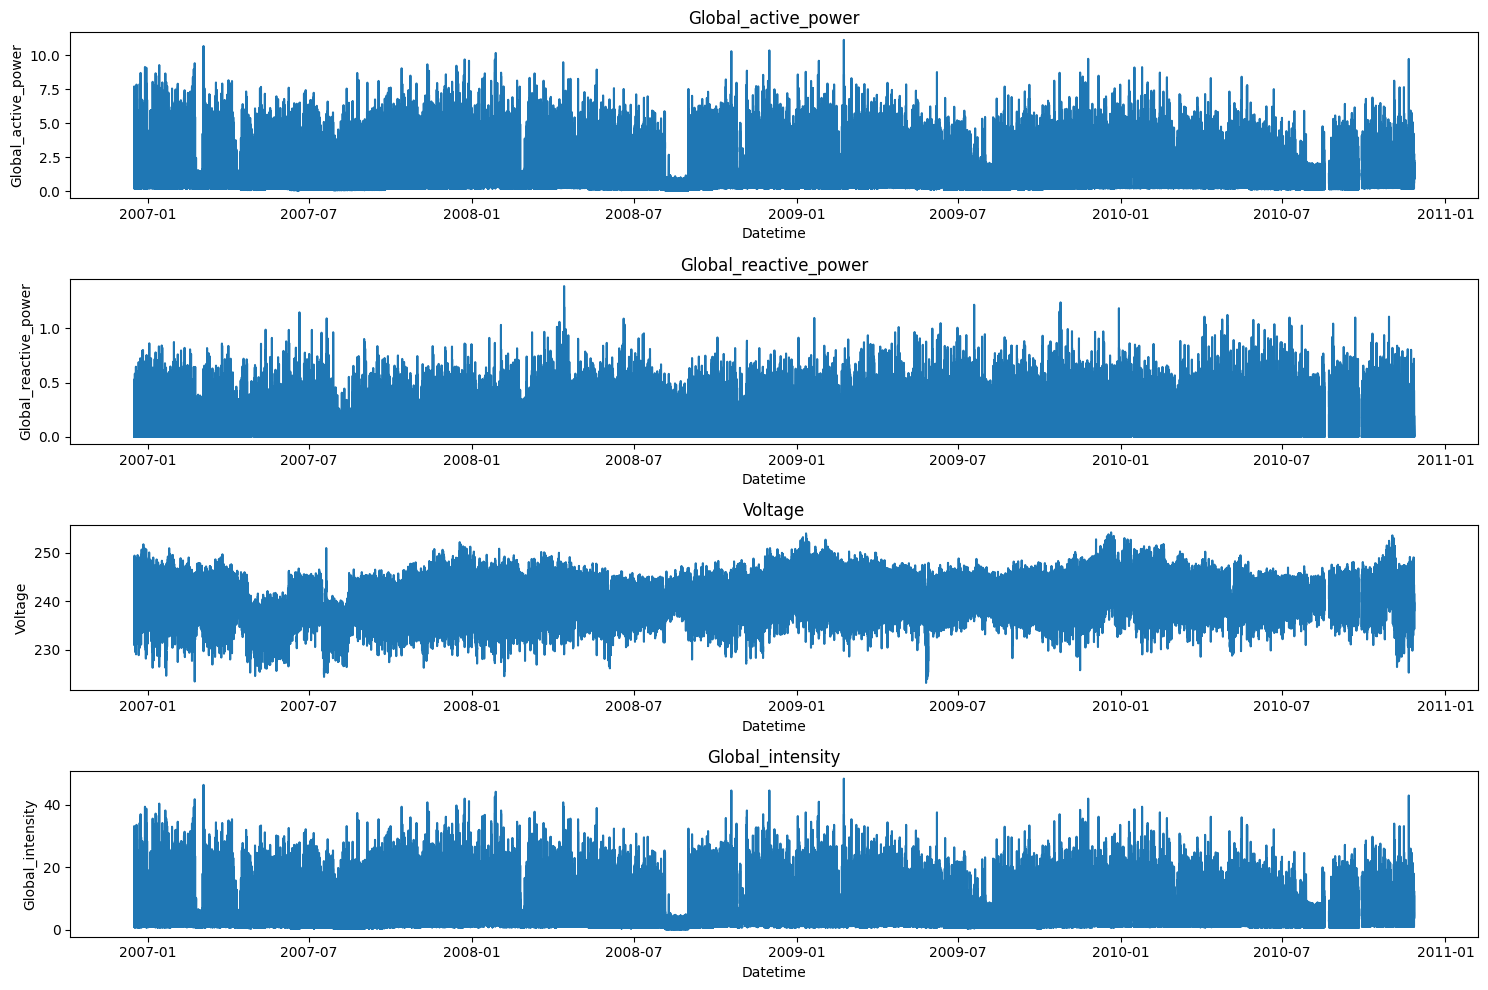

In [25]:
import matplotlib.pyplot as plt

# Assuming 'df' is your cleaned DataFrame and these columns exist after cleaning

# Set the index of the DataFrame to 'Datetime' for easier plotting
df.set_index('Datetime', inplace=True)

# List of variables to plot
variables_to_plot = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']

# Plotting each variable in a separate subplot
plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(len(variables_to_plot), 1, i)
    plt.plot(df[variable])
    plt.title(variable)
    plt.ylabel(variable)
    plt.xlabel('Datetime')

plt.tight_layout()
plt.show()


Global Active Power: There are noticeable spikes in power consumption which may correspond to specific events or times of high usage. It's also apparent that there's a cyclical pattern, possibly indicating higher and lower usage during different seasons or months.

Global Reactive Power: This seems to follow a similar pattern to active power, but the variability seems less pronounced. It's interesting to note that reactive power doesn't spike as high as active power, which is typical because reactive power is the portion of electricity that isn't used for work but for sustaining magnetic fields in appliances.

Voltage: The voltage appears relatively stable over time, with only minor fluctuations. This stability is expected in well-regulated power systems.

Global Intensity: This metric appears to closely mirror the Global Active Power, which makes sense as intensity is a function of power (related to current).

<ipython-input-26-5a7ec6a6e39e>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


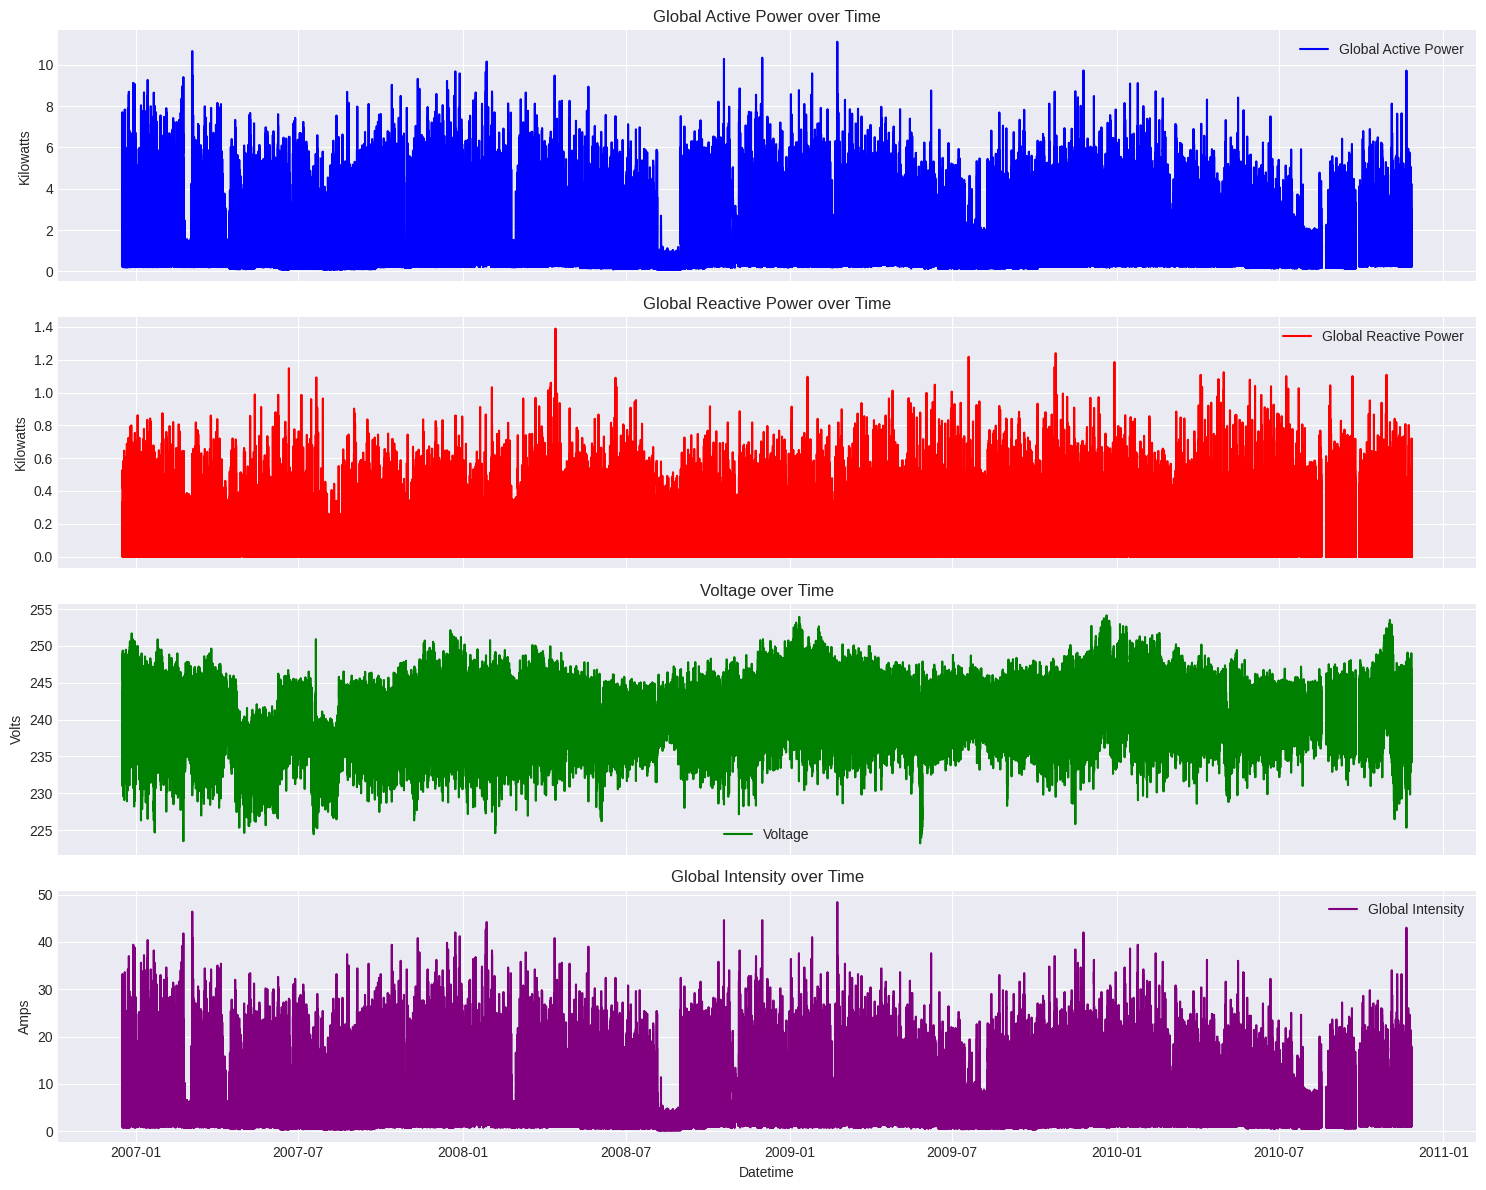

In [26]:
#build your line chart here
# Make sure matplotlib is imported
import matplotlib.pyplot as plt

# Set the style for the plots
plt.style.use('seaborn-darkgrid')

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plot Global_active_power
axs[0].plot(df.index, df['Global_active_power'], label='Global Active Power', color='blue')
axs[0].set_title('Global Active Power over Time')
axs[0].set_ylabel('Kilowatts')

# Plot Global_reactive_power
axs[1].plot(df.index, df['Global_reactive_power'], label='Global Reactive Power', color='red')
axs[1].set_title('Global Reactive Power over Time')
axs[1].set_ylabel('Kilowatts')

# Plot Voltage
axs[2].plot(df.index, df['Voltage'], label='Voltage', color='green')
axs[2].set_title('Voltage over Time')
axs[2].set_ylabel('Volts')

# Plot Global_intensity
axs[3].plot(df.index, df['Global_intensity'], label='Global Intensity', color='purple')
axs[3].set_title('Global Intensity over Time')
axs[3].set_ylabel('Amps')

# Set the x-axis label
axs[3].set_xlabel('Datetime')

# Add a legend to each subplot
for ax in axs:
    ax.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:
Variability: The 'Global Active Power' and 'Global Intensity' show significant variability over time, with noticeable peaks and troughs. This suggests periods of high and low electricity usage, which could be indicative of specific behaviors or events (e.g., more usage in the evenings or during certain seasons).

Patterns: Despite the variability, there may be underlying patterns that correspond to daily or seasonal cycles, particularly visible in the 'Global Active Power' chart. However, due to the granularity of the data, these patterns might not be immediately clear.

Correlation: The 'Global Active Power' and 'Global Intensity' appear to have a correlated pattern, rising and falling together. This makes sense as they are related to each other through the electrical power formula (power equals voltage times current).

Stability: The 'Voltage' remains relatively stable compared to the other variables, although there are still noticeable fluctuations that could be due to changes in the grid or household demand.

Reactive Power: The 'Global Reactive Power' does not show as clear a pattern as 'Global Active Power' or 'Global Intensity'. Its spikes are less pronounced, and the values are generally lower. This is expected since reactive power does not do useful work and is related to the phase difference between voltage and current.

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).**

<ipython-input-29-1bc6e2a1169b>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_averages = df.resample('M').mean()


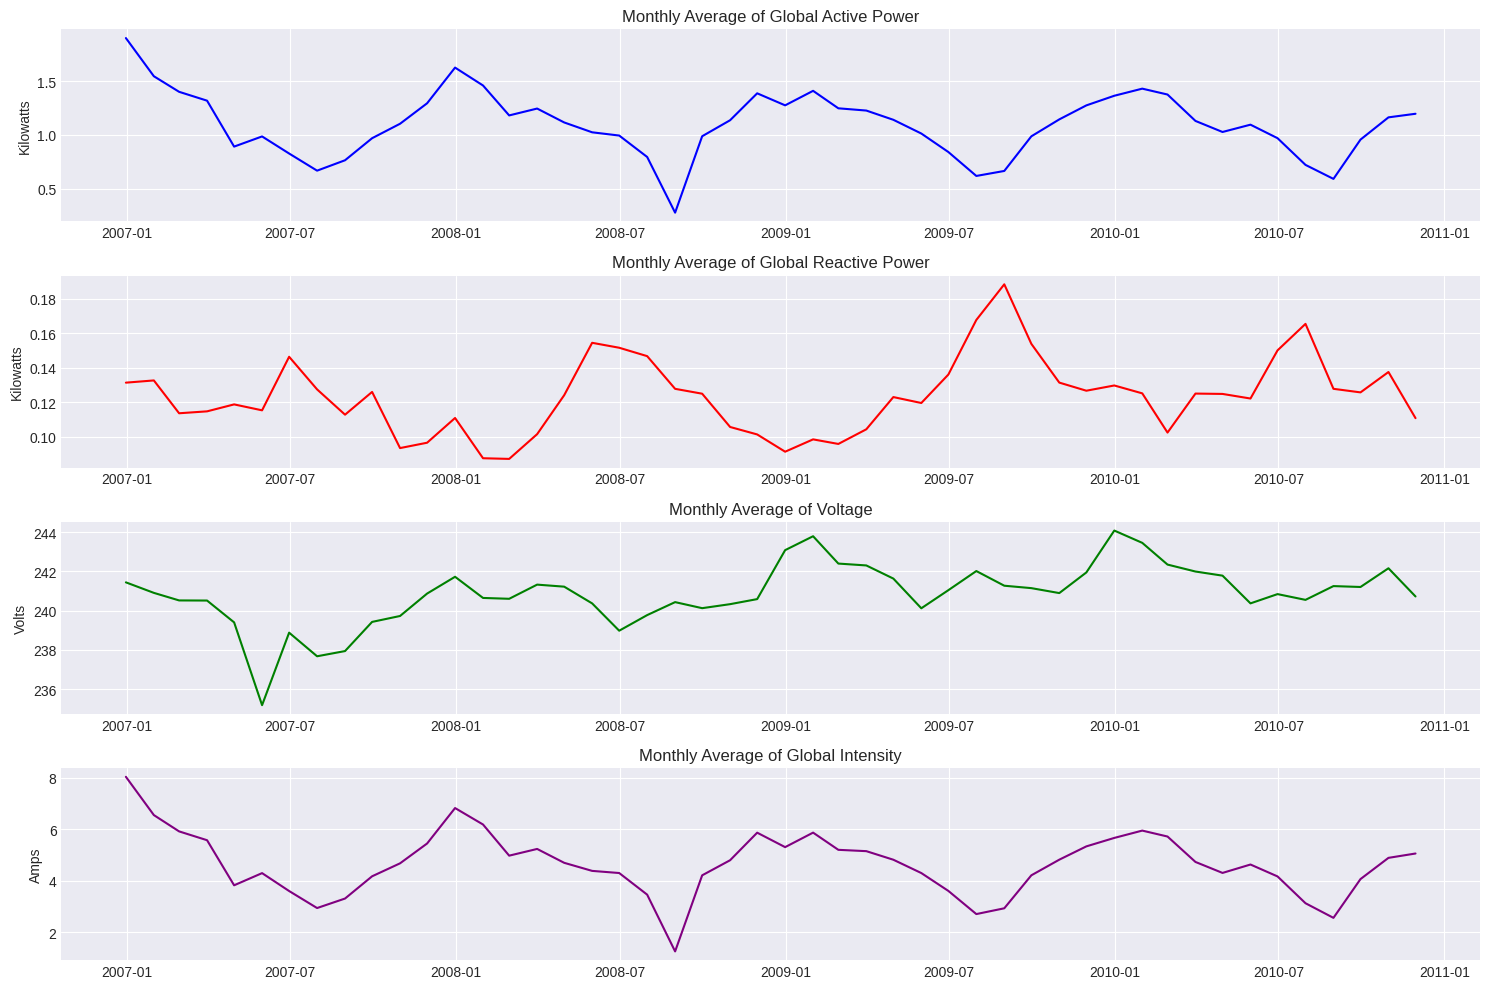

In [29]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

# Convert 'Date' and 'Time' to strings if they aren't already
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

# Combine 'Date' and 'Time' into 'Datetime'
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Now set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

# Compute the monthly average for each column
monthly_averages = df.resample('M').mean()




# Plotting the monthly averages
plt.figure(figsize=(15, 10))

# Plot Global Active Power
plt.subplot(4, 1, 1)
plt.plot(monthly_averages['Global_active_power'], label='Global Active Power', color='blue')
plt.title('Monthly Average of Global Active Power')
plt.ylabel('Kilowatts')

# Plot Global Reactive Power
plt.subplot(4, 1, 2)
plt.plot(monthly_averages['Global_reactive_power'], label='Global Reactive Power', color='red')
plt.title('Monthly Average of Global Reactive Power')
plt.ylabel('Kilowatts')

# Plot Voltage
plt.subplot(4, 1, 3)
plt.plot(monthly_averages['Voltage'], label='Voltage', color='green')
plt.title('Monthly Average of Voltage')
plt.ylabel('Volts')

# Plot Global Intensity
plt.subplot(4, 1, 4)
plt.plot(monthly_averages['Global_intensity'], label='Global Intensity', color='purple')
plt.title('Monthly Average of Global Intensity')
plt.ylabel('Amps')

plt.tight_layout()
plt.show()


<ipython-input-30-38d546179719>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


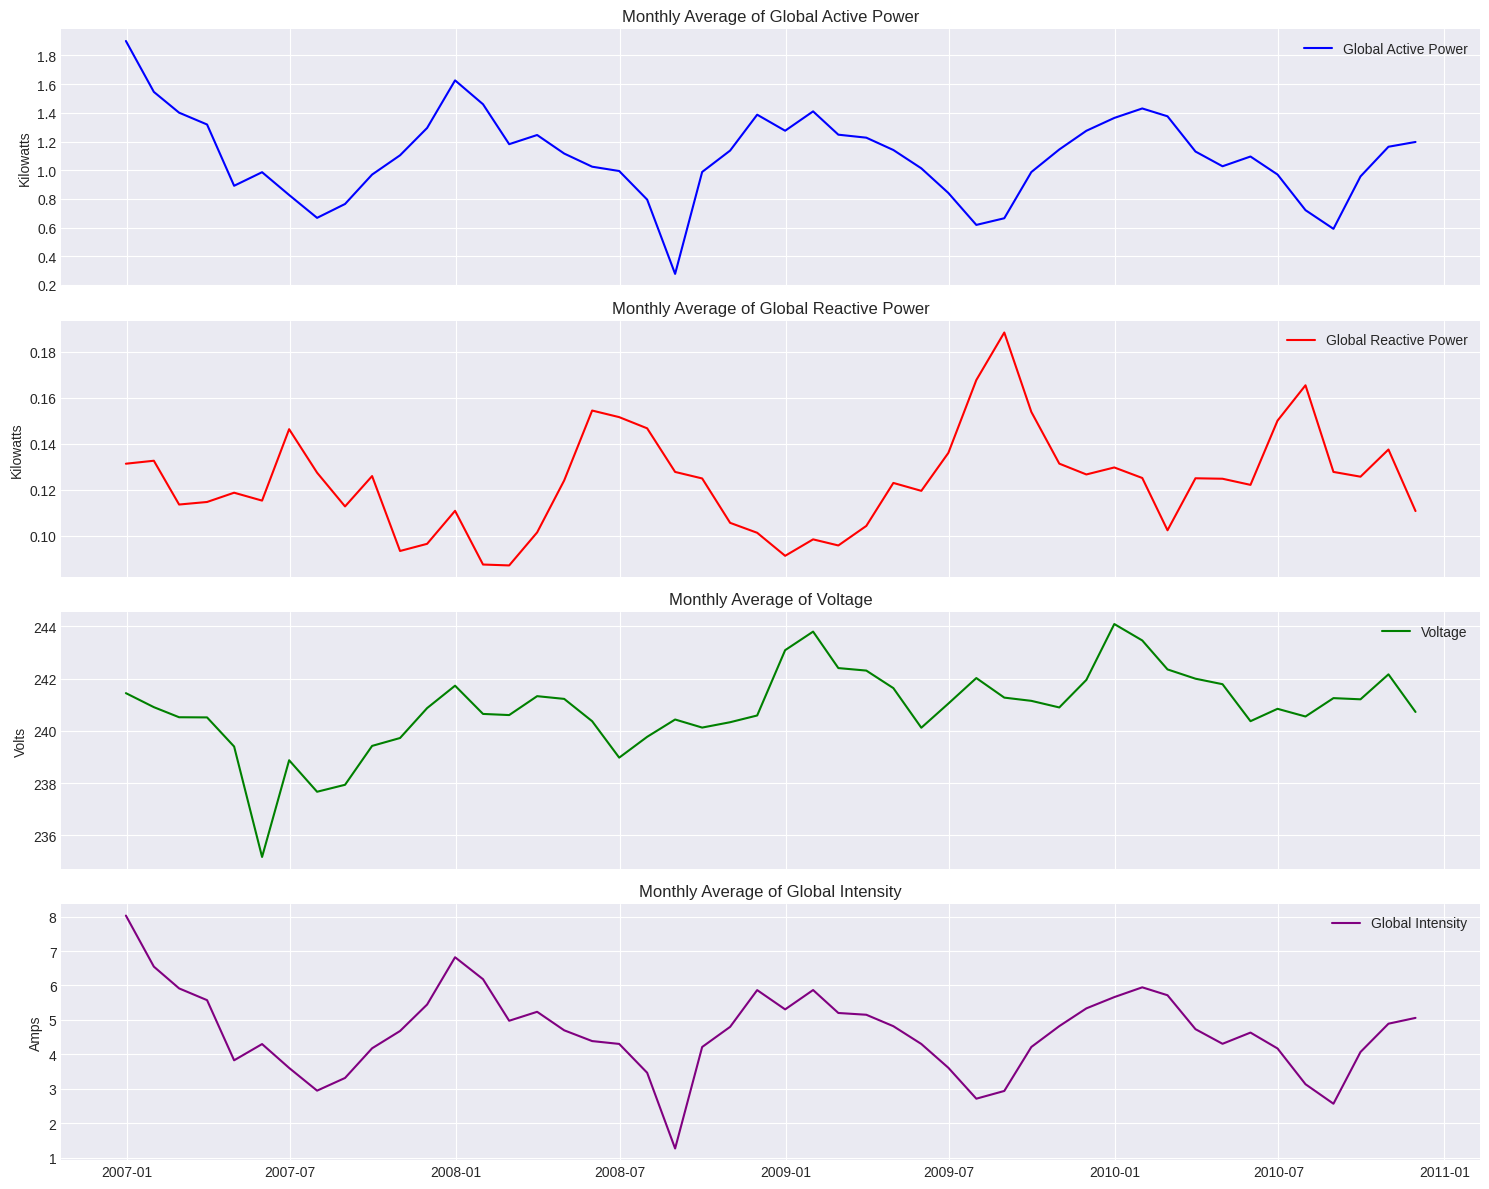

In [30]:
#build your line chart here
# Ensure matplotlib is imported
import matplotlib.pyplot as plt

# Assuming 'monthly_averages' contains the monthly average data with 'Datetime' as an index
# We will create line charts for 'Global_active_power', 'Global_reactive_power', 'Voltage', and 'Global_intensity'

# Set the style for the plots
plt.style.use('seaborn-darkgrid')

# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)

# Plot Global Active Power
axs[0].plot(monthly_averages.index, monthly_averages['Global_active_power'], label='Global Active Power', color='blue')
axs[0].set_title('Monthly Average of Global Active Power')
axs[0].set_ylabel('Kilowatts')

# Plot Global Reactive Power
axs[1].plot(monthly_averages.index, monthly_averages['Global_reactive_power'], label='Global Reactive Power', color='red')
axs[1].set_title('Monthly Average of Global Reactive Power')
axs[1].set_ylabel('Kilowatts')

# Plot Voltage
axs[2].plot(monthly_averages.index, monthly_averages['Voltage'], label='Voltage', color='green')
axs[2].set_title('Monthly Average of Voltage')
axs[2].set_ylabel('Volts')

# Plot Global Intensity
axs[3].plot(monthly_averages.index, monthly_averages['Global_intensity'], label='Global Intensity', color='purple')
axs[3].set_title('Monthly Average of Global Intensity')
axs[3].set_ylabel('Amps')

# Add legends and adjust layout
for ax in axs:
    ax.legend(loc='best')
plt.tight_layout()
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A:
Global Active Power: There appears to be a seasonal pattern, with peaks typically occurring during certain times of the year. This could indicate higher energy use in colder or warmer months due to heating and air conditioning.

Global Reactive Power: The reactive power doesn't seem to follow as clear a seasonal trend as the active power. However, there are variations that could be associated with changes in how the household's electrical devices are used or in the types of devices used at different times of the year.

Voltage: The voltage shows less variability compared to the power variables. There are slight fluctuations that may correlate with changes in the overall demand on the electrical grid.

Global Intensity: This closely follows the pattern of the Global Active Power, which suggests a direct relationship between the intensity of electricity use and the active power consumed. Peaks in Global Intensity coincide with peaks in Global Active Power, indicating periods of high energy consumption.

Overall, Global Active Power and Global Intensity show a correlated pattern, moving together over time, which is expected as they are both related to the amount of electrical energy used. The seasonal patterns observed in these variables can provide valuable insights for demand forecasting and energy management. The other variables, while less variable, still offer insights into the electrical characteristics of the household and could be important for a more detailed analysis related to efficiency and power quality.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [33]:
#compute your moving average here
# Calculate the 30-day moving average for the desired columns
# The window size is set to 30, assuming the data has a daily frequency
df_moving_average = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].rolling(window=30).mean()

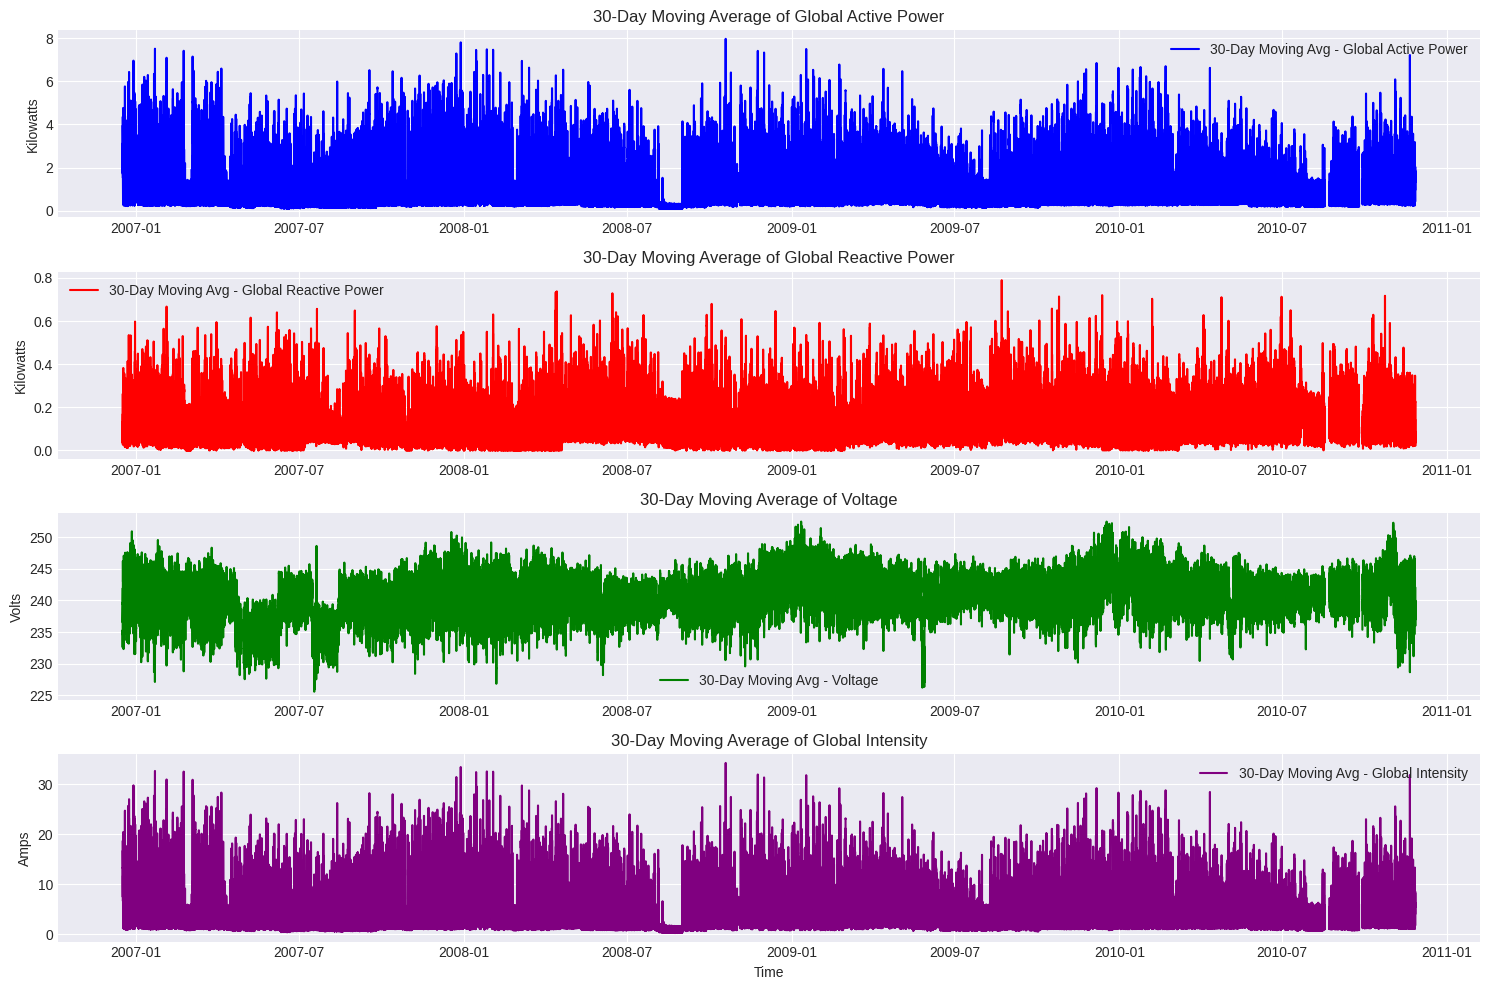

In [36]:
#build your line chart on the moving average here
# Plotting the moving averages
plt.figure(figsize=(15, 10))

# Plot 30-day moving average of Global Active Power
plt.subplot(4, 1, 1)
plt.plot(df_moving_average.index, df_moving_average['Global_active_power'], label='30-Day Moving Avg - Global Active Power', color='blue')
plt.title('30-Day Moving Average of Global Active Power')
plt.ylabel('Kilowatts')

# Plot 30-day moving average of Global Reactive Power
plt.subplot(4, 1, 2)
plt.plot(df_moving_average.index, df_moving_average['Global_reactive_power'], label='30-Day Moving Avg - Global Reactive Power', color='red')
plt.title('30-Day Moving Average of Global Reactive Power')
plt.ylabel('Kilowatts')

# Plot 30-day moving average of Voltage
plt.subplot(4, 1, 3)
plt.plot(df_moving_average.index, df_moving_average['Voltage'], label='30-Day Moving Avg - Voltage', color='green')
plt.title('30-Day Moving Average of Voltage')
plt.ylabel('Volts')

# Plot 30-day moving average of Global Intensity
plt.subplot(4, 1, 4)
plt.plot(df_moving_average.index, df_moving_average['Global_intensity'], label='30-Day Moving Avg - Global Intensity', color='purple')
plt.title('30-Day Moving Average of Global Intensity')
plt.ylabel('Amps')
plt.xlabel('Time')

# Show the legend
for ax in plt.gcf().axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A:
Global Active Power: The moving average smooths out the daily fluctuations and provides a clearer view of the underlying trends. Compared to the monthly average, the moving average offers a more granular perspective, revealing shorter-term variations within each month.

Global Reactive Power: Similarly, the moving average smooths the spikes and dips, giving a less noisy view than the daily data. However, it still retains more variability than the monthly average, which could be helpful for observing mid-term trends.

Voltage: The moving average here shows a smoother trend line than the daily data, which can be useful for identifying underlying trends without the distraction of short-term fluctuations.

Global Intensity: The moving average provides a smoothed trend that follows the pattern of Global Active Power, suggesting a strong correlation between the two.

Comparing the moving average to the monthly average, the moving average retains more of the data's variability, offering insights into the trends within each month that the monthly average might obscure. However, the monthly average provides a more simplified view, which can be useful for observing long-term trends and patterns without the noise of daily variation.



For identifying long-term trends and seasonal patterns, the monthly average might be more effective because it offers a clear, simplified view of changes over time without too much detail.
For observing more immediate trends, understanding short-term fluctuations, and detecting anomalies, the 30-day moving average is more effective as it smooths out daily noise but still responds to more rapid changes in the data.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

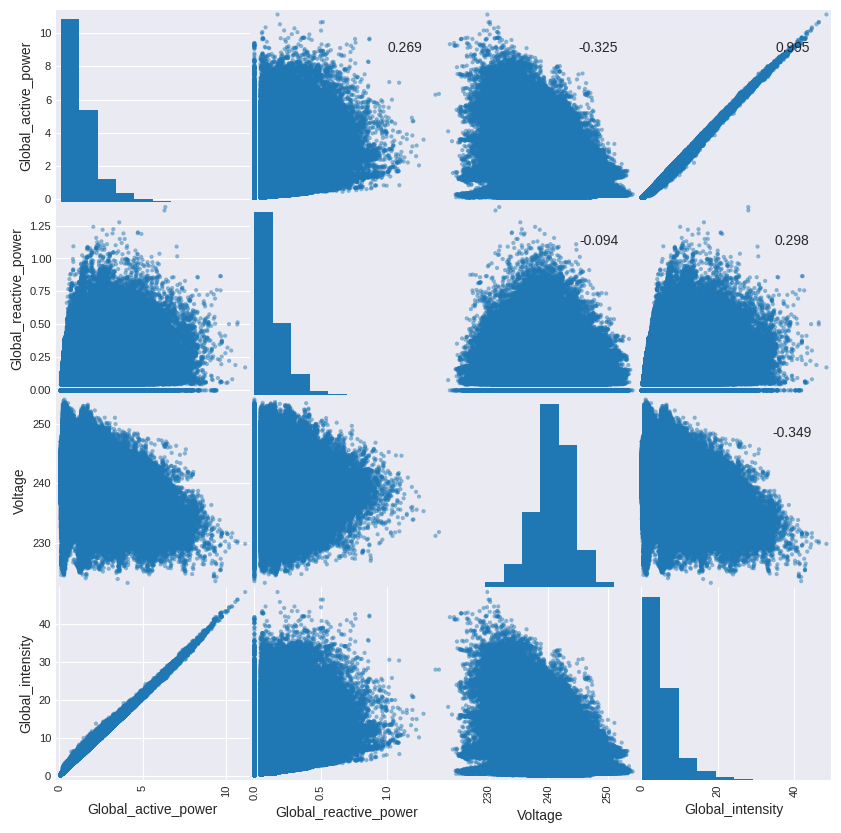

In [37]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A:

Global Active Power and Global Intensity: There is a strong positive correlation (as indicated by a correlation coefficient close to 1). The scatter plot for these two variables would show points lying close to a line, indicating that as one variable increases, so does the other. This makes sense as active power and intensity are directly related (power is the product of voltage and current, which relates to intensity).

Global Active Power and Global Reactive Power: There seems to be a positive correlation, but not as strong as with intensity. This suggests that when active power consumption is high, there is often also more reactive power, but the relationship is not as direct.

Voltage and other variables: The correlation is negative, which may indicate that as voltage slightly decreases, the power and intensity increase. This could be due to the fact that when more electrical devices are turned on (leading to higher power and intensity), the overall voltage in the house might drop slightly due to increased demand on the electrical system.

Global Reactive Power and Global Intensity: The correlation is positive but not very strong, indicating that there is some relationship between reactive power and intensity, but it's not as significant as with active power.


In terms of the impact on downstream tasks:

Data Modeling: Understanding these correlations is crucial when selecting features for predictive modeling. Highly correlated features can lead to multicollinearity in regression models, which can distort the importance of individual features.

Anomaly Detection: If certain variables are known to have a strong correlation, deviations from this relationship can be a sign of anomalies or data issues.

Energy Management: For tasks related to energy efficiency, understanding the relationships between different types of power and voltage can help in optimizing electrical systems.

Load Forecasting: Correlations can be used to better forecast demand on the power system, as changes in one variable can inform expectations about another.